# 🌍 Project MLBI — Analysis COVID-19
**Realized by  : Yassine Gouesmi & Chaima Ben Arbia**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/covid19.csv')

In [4]:
dataset.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


#Checking Data Values to Tell which Attributes has direct Connection to Whether Someone is going to get Sick or Not

In [5]:
dataset.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [6]:
dataset['Province/State'].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Manitoba', 'New Brunswick', 'Newfoundland and Labrador',
       'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Quebec',
       'Saskatchewan', 'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu',
       'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei',
       'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan',
       'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning',
       'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai',
       'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang', 'Yunnan',
       'Zhejiang', 'Faroe Islands', 'Greenland', 'French Guiana',
       'French Polynesia', 'Guadeloupe', 'Mayotte', 'New Caledonia',
       'Reunion', 'Saint Barthelemy', 'St Martin', 'Martinique', 'Aruba',
       'Curacao', 'Sint Maarten', 'Bermud

In [7]:
dataset['Country/Region'].unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ind

In [8]:
dataset['Confirmed'].unique()


array([   0,    1,   14, ..., 7413, 3664, 7235])

In [9]:
dataset['Deaths'].unique()


array([     0,     17,      1, ...,   5630,  45759, 148011])

In [10]:
dataset['Recovered'].unique()


array([   0,   28,    2, ..., 4027, 1317, 6028])

In [11]:
dataset['Active'].unique()


array([   0,    1,   14, ..., 9414, 5883, 6791])

In [12]:
dataset['WHO Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [13]:
dataset.dtypes

,0
Province/State,object
Country/Region,object
Lat,float64
Long,float64
Date,object
Confirmed,int64
Deaths,int64
Recovered,int64
Active,int64
WHO Region,object


#Dropping unnecessary Attributes unrelevant to Machine Learning model Input

Lat and Long Attributes are not unnecessary for the prediction

In [14]:
dataset = dataset.drop(['Lat','Long','Province/State'],axis=1)

In [15]:
dataset.head()

,Country/Region,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,2020-01-22,0,0,0,0,Europe
2,Algeria,2020-01-22,0,0,0,0,Africa
3,Andorra,2020-01-22,0,0,0,0,Europe
4,Angola,2020-01-22,0,0,0,0,Africa


#Visualisation of Data

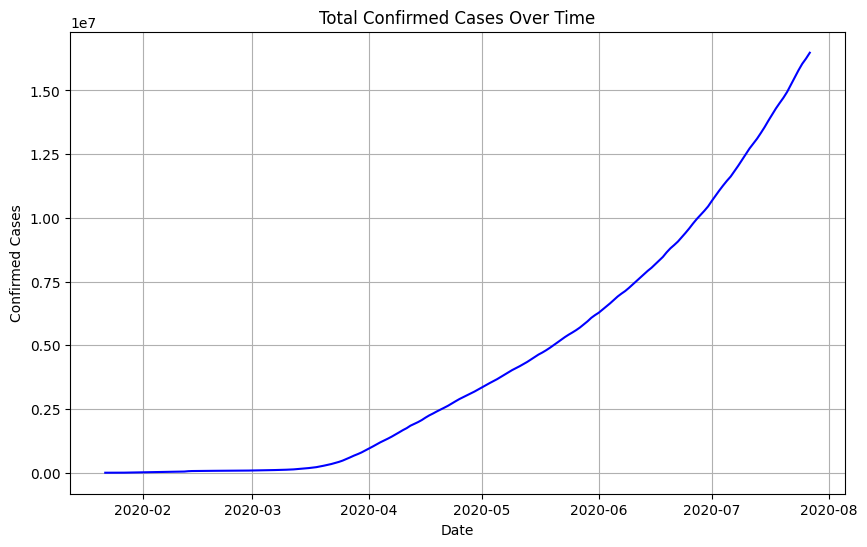

In [16]:
# Convert Date column to datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Group by Date and sum the confirmed cases
total_cases_by_date = dataset.groupby('Date')['Confirmed'].sum()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(total_cases_by_date, color='b')
plt.title('Total Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.grid(True)
plt.show()

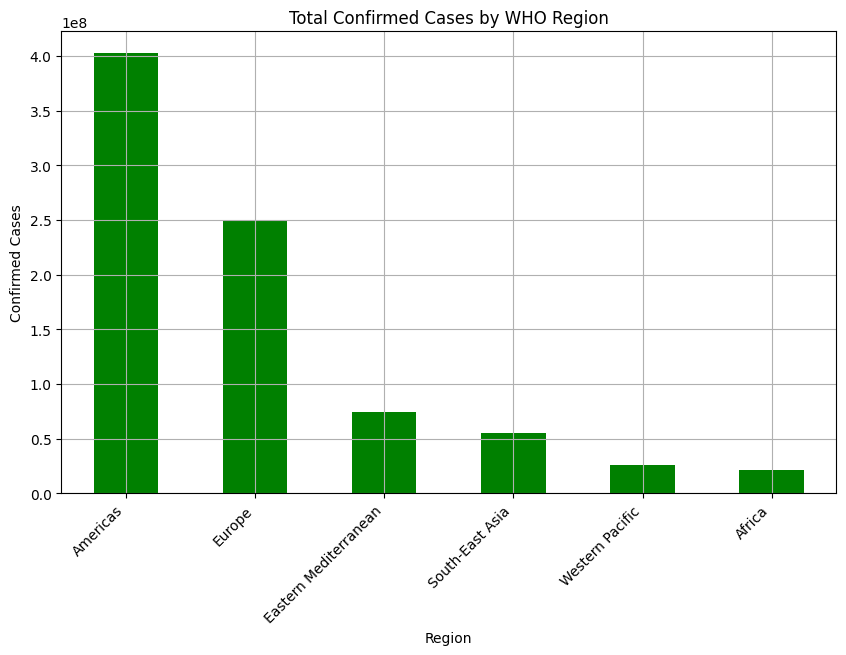

In [17]:
# Group by WHO Region and sum confirmed cases
cases_by_region = dataset.groupby('WHO Region')['Confirmed'].sum()

# Plot the data
plt.figure(figsize=(10, 6))
cases_by_region.sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Total Confirmed Cases by WHO Region')
plt.xlabel('Region')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


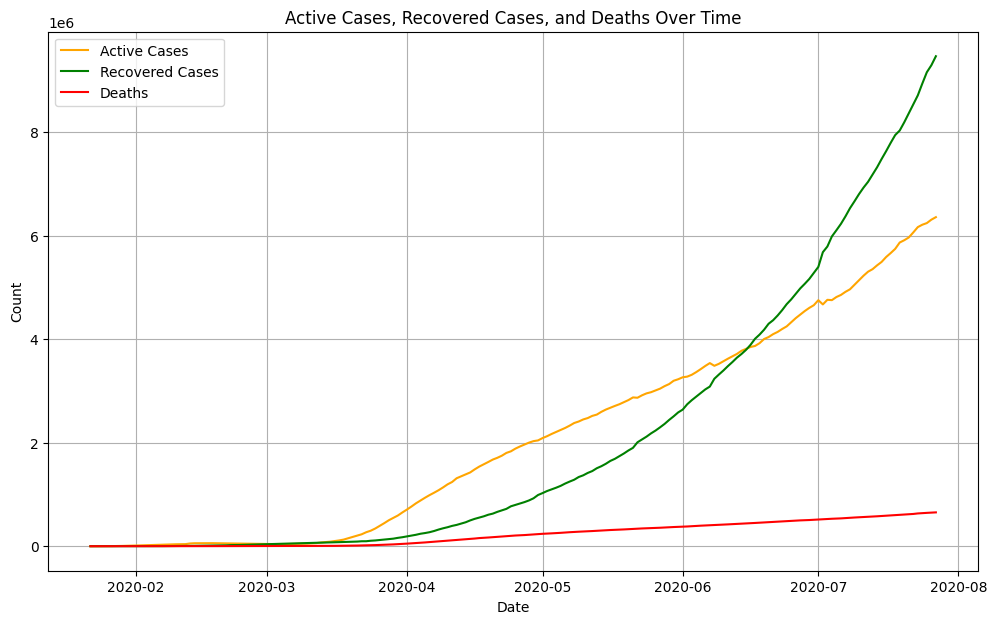

In [18]:
# Group by Date and sum Active, Recovered, and Deaths cases
daily_cases = dataset.groupby('Date')[['Active', 'Recovered', 'Deaths']].sum()

# Plot the data
plt.figure(figsize=(12, 7))
plt.plot(daily_cases.index, daily_cases['Active'], label='Active Cases', color='orange')
plt.plot(daily_cases.index, daily_cases['Recovered'], label='Recovered Cases', color='green')
plt.plot(daily_cases.index, daily_cases['Deaths'], label='Deaths', color='red')
plt.title('Active Cases, Recovered Cases, and Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


#Preparing Data for the Model

In [19]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset = dataset.sort_values(['Country/Region','Date'])

In [20]:
dataset.head()

,Country/Region,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,2020-01-22,0,0,0,0,Eastern Mediterranean
261,Afghanistan,2020-01-23,0,0,0,0,Eastern Mediterranean
522,Afghanistan,2020-01-24,0,0,0,0,Eastern Mediterranean
783,Afghanistan,2020-01-25,0,0,0,0,Eastern Mediterranean
1044,Afghanistan,2020-01-26,0,0,0,0,Eastern Mediterranean


In [21]:
# CONFIG
future_days = 10
lag_days = 5  # use last 5 days as features
test_size = 10  # last 10 days per country for evaluation

# --- Prepare Dataset ---
df = dataset[['Date', 'Country/Region', 'WHO Region', 'Confirmed']].copy()
df = df.sort_values(['Country/Region', 'Date'])
df['Date'] = pd.to_datetime(df['Date'])

# Encode categorical features
le_country = LabelEncoder()
le_region = LabelEncoder()
df['Country_Code'] = le_country.fit_transform(df['Country/Region'])
df['Region_Code'] = le_region.fit_transform(df['WHO Region'])

# --- Feature Engineering : Creating new Features corresponding to time for pattern recognition Training and more generalisation for Model ---
for lag in range(1, lag_days + 1):
    df[f'lag_{lag}'] = df.groupby('Country_Code')['Confirmed'].shift(lag)

df['dayofyear'] = df['Date'].dt.dayofyear
df['week'] = df['Date'].dt.isocalendar().week.astype(int)

df = df.dropna()

# --- Split Train/Test ---
train_df = df.groupby('Country_Code').apply(lambda x: x.iloc[:-test_size]).reset_index(drop=True)
test_df = df.groupby('Country_Code').apply(lambda x: x.iloc[-test_size:]).reset_index(drop=True)

feature_cols = [f'lag_{i}' for i in range(1, lag_days + 1)] + ['dayofyear', 'week', 'Country_Code', 'Region_Code']
target_col = 'Confirmed'

X_train, y_train = train_df[feature_cols], train_df[target_col]
X_test, y_test = test_df[feature_cols], test_df[target_col]

/tmp/ipython-input-2275108330.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_df = df.groupby('Country_Code').apply(lambda x: x.iloc[:-test_size]).reset_index(drop=True)
/tmp/ipython-input-2275108330.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_df = df.groupby('Country_Code').apply(lambda x: x.iloc[-test_size:]).reset_index(drop=True)


In [22]:
# --- Train Global Model ---
model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

# Evaluating The Model on each Country

In [23]:
# --- Per-country Metrics ---
metrics = []
for country_code in df['Country_Code'].unique():
    mask = test_df['Country_Code'] == country_code
    if not mask.any():
        continue
    y_true = y_test[mask]
    y_pred_country = model.predict(X_test[mask])
    metrics.append({
        'Country/Region': le_country.inverse_transform([country_code])[0],
        'MAE': mean_absolute_error(y_true, y_pred_country),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred_country)),
        'MAPE (%)': np.mean(np.abs((y_true - y_pred_country) / (y_true + 1e-10))) * 100
    })

metrics_df = pd.DataFrame(metrics)

#Evalutating Model on Test

In [24]:
# --- Evaluate on Test ---
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-10))) * 100

print("✅ Model evaluation complete!")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

✅ Model evaluation complete!
MAE: 7646.24
RMSE: 40429.63
MAPE: 998.40%


In [25]:
metrics_df = pd.DataFrame(metrics)
print("\n🌍 Per-country metrics:")
display(metrics_df.head(10))
print("\n🌍 Global mean metrics:")
print(metrics_df[['MAE', 'RMSE', 'MAPE (%)']].mean())


🌍 Per-country metrics:


,Country/Region,MAE,RMSE,MAPE (%)
0,Afghanistan,433.278137,516.699502,1.215490
1,Albania,1364.069702,1367.385096,30.898194
2,Algeria,642.388062,750.447408,2.597880
3,Andorra,1084.349976,1084.463174,121.785891
4,Angola,1451.487305,1545.030582,183.823761
5,Antigua and Barbuda,1246.549561,1322.358641,1563.970015
6,Argentina,8805.565430,11356.007749,6.316201
7,Armenia,784.987122,897.971882,2.164621
8,Australia,1661.273193,2449.666712,951.534458
9,Austria,1998.708252,2003.506426,9.980868



🌍 Global mean metrics:
MAE         7646.240453
RMSE        8583.035583
MAPE (%)     998.397273
dtype: float64


# Make Prediction for the next 10 days Per Country

In [26]:
# --- Predict Next 10 Days ---
predictions = []
last_dates = df.groupby('Country_Code')['Date'].max().to_dict()

for country_code, last_date in last_dates.items():
    country_df = df[df['Country_Code'] == country_code].copy()
    for day in range(1, future_days + 1):
        # Create next date
        next_date = last_date + pd.Timedelta(days=day)
        last_row = country_df.iloc[-1:].copy()

        # Shift lags manually
        for lag in range(lag_days, 1, -1):
            last_row[f'lag_{lag}'] = last_row[f'lag_{lag - 1}'].values
        last_row['lag_1'] = last_row['Confirmed'].values

        # Update features
        last_row['dayofyear'] = next_date.timetuple().tm_yday
        last_row['week'] = pd.Timestamp(next_date).isocalendar().week
        last_row['Date'] = next_date

        X_future = last_row[feature_cols]
        y_future = model.predict(X_future)[0]

        # Append prediction
        predictions.append({
            'Date': next_date,
            'Predicted_Confirmed': y_future,
            'Country/Region': le_country.inverse_transform([country_code])[0],
            'WHO Region': le_region.inverse_transform([int(last_row['Region_Code'])])[0]
        })

        # Add prediction to history for iterative prediction
        new_row = last_row.copy()
        new_row['Confirmed'] = y_future
        country_df = pd.concat([country_df, new_row])

forecast_df = pd.DataFrame(predictions)
print("\n✅ Forecast for next 10 days generated for all countries!")
display(forecast_df.head(10))

/tmp/ipython-input-4142172365.py:30: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  'WHO Region': le_region.inverse_transform([int(last_row['Region_Code'])])[0]
/tmp/ipython-input-4142172365.py:30: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  'WHO Region': le_region.inverse_transform([int(last_row['Region_Code'])])[0]
/tmp/ipython-input-4142172365.py:30: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  'WHO Region': le_region.inverse_transform([int(last_row['Region_Code'])])[0]
/tmp/ipython-input-4142172365.py:30: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  'WHO Region': le_region.inverse_transform([int(last_row['


✅ Forecast for next 10 days generated for all countries!


/tmp/ipython-input-4142172365.py:30: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  'WHO Region': le_region.inverse_transform([int(last_row['Region_Code'])])[0]
/tmp/ipython-input-4142172365.py:30: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  'WHO Region': le_region.inverse_transform([int(last_row['Region_Code'])])[0]
/tmp/ipython-input-4142172365.py:30: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  'WHO Region': le_region.inverse_transform([int(last_row['Region_Code'])])[0]
/tmp/ipython-input-4142172365.py:30: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  'WHO Region': le_region.inverse_transform([int(last_row['

,Date,Predicted_Confirmed,Country/Region,WHO Region
0,2020-07-28,38856.273438,Afghanistan,Eastern Mediterranean
1,2020-07-29,38856.273438,Afghanistan,Eastern Mediterranean
2,2020-07-30,39086.875000,Afghanistan,Eastern Mediterranean
3,2020-07-31,39832.046875,Afghanistan,Eastern Mediterranean
4,2020-08-01,42866.902344,Afghanistan,Eastern Mediterranean
5,2020-08-02,42930.601562,Afghanistan,Eastern Mediterranean
6,2020-08-03,43274.054688,Afghanistan,Eastern Mediterranean
7,2020-08-04,46351.199219,Afghanistan,Eastern Mediterranean
8,2020-08-05,46614.566406,Afghanistan,Eastern Mediterranean
9,2020-08-06,47434.375000,Afghanistan,Eastern Mediterranean


# Exporting Data Predicted As a CSV file For Power BI Dashboard

###Méthode manuelle pour envoyer les données vers Power BI

In [27]:
# Exportation to Power BI
output_path = '/content/predictions_future_10days_XGBOOST.csv'
forecast_df.to_csv(output_path, index=False)
print(f'✅ Fichier exporté avec succès : {output_path}')

✅ Fichier exporté avec succès : /content/predictions_future_10days_XGBOOST.csv


###Méthode Automatique pour envoyer les données vers Power BI `app.powerbi.com`

In [ ]:
import time
import requests
import json

#API de passage de données vers PowerBI
push_url ="your power bi api url here "

last_data = None

while True:
    try:
        # Préparation de données pour PowerBI
        forecast_df_json_compatible = forecast_df.copy()
        forecast_df_json_compatible['Date'] = forecast_df_json_compatible['Date'].dt.strftime('%Y-%m-%dT%H:%M:%S')
        data = forecast_df_json_compatible.to_dict(orient="records")

        # Envoyer les données seulement Si il y a un changement
        if data != last_data:
            response = requests.post(push_url, data=json.dumps(data))
            print("Status:", response.status_code, response.text)
            last_data = data
        else:
            print("No changes - skipping send")
        time.sleep(1)

    except Exception as e:
        print(f"Error: {e}")
        time.sleep(5)
    except KeyboardInterrupt:
        print("\nLoop stopped by user")
        break

Status: 200 
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - skipping send
No changes - sk